## Machine Learning (Supervised)


![Mobile](https://thinkingneuron.com/wp-content/uploads/2020/09/Car-price-prediction-case-study.png)
[Dataset](https://www.kaggle.com/toramky/automobile-dataset)

#### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', 100)
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

#### Import Dataset

In [2]:
data = pd.read_csv(r'/Users/user/Desktop/BootCamp/BAHAN/Automobile_data.csv')

#### quick look

In [3]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Exploratory Data Analysis (EDA)

### Cleansing Data

#### Check for Duplicates Data

In [4]:
data.duplicated().any()

False

#### Missing Value & Data Type

In [5]:
data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [7]:
nama_kolom = list(data.columns)

for kolom in nama_kolom:
    data.loc[data[kolom]=='?', kolom] = np.nan

In [8]:
def missing_data(data):    
    df_miss = pd.DataFrame(data.isnull().sum()).reset_index()
    df_miss.columns = ['column', 'count']
    df_miss = df_miss.loc[df_miss['count']!=0]
    df_miss['percent'] = round(df_miss['count']/data.shape[0]*100, 2)
    tipe_data = []
    contoh_data = []
    for kolom in list(df_miss['column']):
        tipe_data.append(data[kolom].dtype)
        contoh_data.append(data[kolom][100])
    df_miss['DataType'] = tipe_data
    df_miss['Example'] = contoh_data
    return df_miss

In [9]:
missing_data(data)

,column,count,percent,DataType,Example
1,normalized-losses,41,20.00,object,106
5,num-of-doors,2,0.98,object,four
18,bore,4,1.95,object,3.33
19,stroke,4,1.95,object,3.47
21,horsepower,2,0.98,object,97
22,peak-rpm,2,0.98,object,5200
25,price,4,1.95,object,9549


In [10]:
kolom_flt = ['normalized-losses', 'horsepower', 'peak-rpm', 'bore', 'stroke']

for kolom in kolom_flt:
    data[kolom] = data[kolom].astype('float64')

In [11]:
median_kolom = ['normalized-losses', 'horsepower', 'peak-rpm']
mean_kolom = ['bore', 'stroke']

for kolom in median_kolom:
    data[kolom] = data[kolom].fillna(data[kolom].median())

for kolom in mean_kolom:
    data[kolom] = data[kolom].fillna(data[kolom].mean())

In [12]:
missing_data(data)

,column,count,percent,DataType,Example
5,num-of-doors,2,0.98,object,four
25,price,4,1.95,object,9549


In [13]:
int_kolom = ['normalized-losses', 'horsepower', 'peak-rpm']

for kolom in int_kolom:
    data[kolom] = data[kolom].astype('int64')

In [14]:
data['num-of-doors'] = data['num-of-doors'].fillna(data['num-of-doors'].mode()[0])

In [15]:
missing_data(data)

,column,count,percent,DataType,Example
25,price,4,1.95,object,9549


In [16]:
data.dropna(inplace=True)

In [17]:
missing_data(data)

,column,count,percent,DataType,Example


In [18]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,13495
1,3.0,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,four,130.0,mpfi,3.47,2.68,9.0,111,5000,21.0,27.0,16500
2,1.0,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,six,152.0,mpfi,2.68,3.47,9.0,154,5000,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,four,109.0,mpfi,3.19,3.40,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,five,136.0,mpfi,3.19,3.40,8.0,115,5500,18.0,22.0,17450


In [19]:
data.shape

(201, 26)

#### Outlier

In [20]:
data['price'] = data['price'].astype('int64')

<AxesSubplot:xlabel='horsepower'>

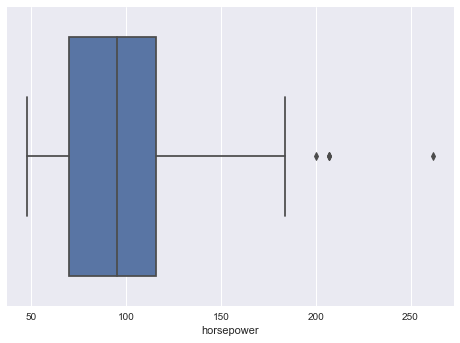

In [21]:
sns.boxplot(data['horsepower'])

**Make Some Visualization**

<AxesSubplot:xlabel='price', ylabel='Count'>

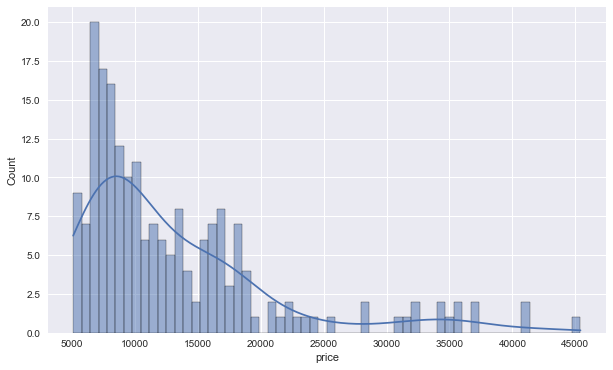

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins = 60)

**Bagaimana hubungan antara tipe bahan bakar dengan harga?**

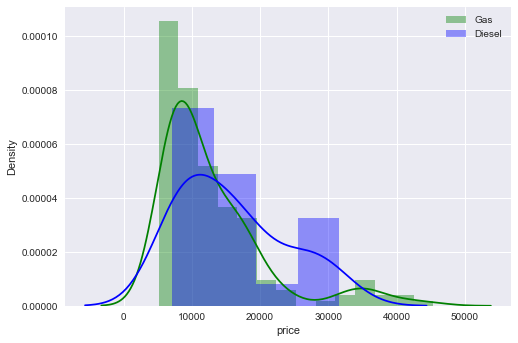

In [23]:
sns.distplot(data.loc[data['fuel-type']=='gas', 'price'], color='green', label='Gas')
sns.distplot(data.loc[data['fuel-type']=='diesel', 'price'], color='blue', label='Diesel')
plt.legend()

# Data Preparation

**Encode Data**

In [24]:
kolom_object = list(data.select_dtypes('object').columns)

In [25]:
len(kolom_object)

10

In [26]:
data.select_dtypes('object').head(3)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi


In [27]:
one_hot_kolom = ['make', 'body-style', 'drive-wheels', 'engine-type', 'fuel-system']
binary_kolom = ['fuel-type', 'aspiration', 'engine-location']
find = ['num-of-cylinders',  'num-of-doors']

In [28]:
data['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [29]:
encode_find = {
    'num-of-cylinders':{'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8},
    'num-of-doors': {'two': 2, 'four': 4}
}

In [30]:
data.replace(encode_find, inplace=True)

In [31]:
from sklearn.preprocessing import LabelEncoder

lE = LabelEncoder()

for kolom in binary_kolom:
    data[kolom] = lE.fit_transform(data[kolom])

In [32]:
#one hot encode

data = pd.get_dummies(data, columns=one_hot_kolom)

In [33]:
data.head(5)

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,115,1,0,2,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111,5000,21.0,27.0,13495,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3.0,115,1,0,2,0,88.6,168.8,64.1,48.8,2548.0,4,130.0,3.47,2.68,9.0,111,5000,21.0,27.0,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.0,115,1,0,2,0,94.5,171.2,65.5,52.4,2823.0,6,152.0,2.68,3.47,9.0,154,5000,19.0,26.0,16500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2.0,164,1,0,4,0,99.8,176.6,66.2,54.3,2337.0,4,109.0,3.19,3.40,10.0,102,5500,24.0,30.0,13950,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2.0,164,1,0,4,0,99.4,176.6,66.4,54.3,2824.0,5,136.0,3.19,3.40,8.0,115,5500,18.0,22.0,17450,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


**Train Test Split**

In [34]:
X = data.drop('price', axis=1)

y = data[['price']]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling & Evaluation

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [38]:
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor()

model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
pred_dt = model_dt.predict(X_test)
pred_rf = model_rf.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

Decision Tree

In [41]:
print('MAE dari Decision Tree :', mean_absolute_error(y_test, pred_dt))
print('RMSE dari Decision Tree :', np.sqrt(mean_squared_error(y_test, pred_dt)))

MAE dari Decision Tree : 1881.9268292682927
RMSE dari Decision Tree : 2826.4294246775253


Random Forest

In [42]:
print('MAE dari Random Forest :', mean_absolute_error(y_test, pred_rf))
print('RMSE dari Random Forest :', np.sqrt(mean_squared_error(y_test, pred_rf)))

MAE dari Random Forest : 1732.4451422764232
RMSE dari Random Forest : 2611.3234686119467


## Tuning

In [43]:
model_dt_2 = DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=3)
model_rf_2 = RandomForestRegressor(n_estimators=150, min_samples_split=5, min_samples_leaf=3)

model_dt_2.fit(X_train, y_train)
model_rf_2.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=3, min_samples_split=5, n_estimators=150)

In [44]:
pred_dt_2 = model_dt_2.predict(X_test)
pred_rf_2 = model_rf_2.predict(X_test)

In [45]:
print('MAE dari Decision Tree :', mean_absolute_error(y_test, pred_dt_2))
print('RMSE dari Decision Tree :', np.sqrt(mean_squared_error(y_test, pred_dt_2)))

MAE dari Decision Tree : 2207.5634146341463
RMSE dari Decision Tree : 3283.2705845805363


In [46]:
print('MAE dari Random Forest :', mean_absolute_error(y_test, pred_rf_2))
print('RMSE dari Random Forest :', np.sqrt(mean_squared_error(y_test, pred_rf_2)))

MAE dari Random Forest : 1808.8795374490014
RMSE dari Random Forest : 2644.7366737987663
